In [2]:
!mkdir ~/.kaggle
from google.colab import files
!mv kaggle.json ~/.kaggle/
!kaggle datasets download -d snap/amazon-fine-food-reviews

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 93% 225M/242M [00:02<00:00, 125MB/s]
100% 242M/242M [00:02<00:00, 122MB/s]


In [3]:
!unzip amazon-fine-food-reviews.zip

Archive:  amazon-fine-food-reviews.zip
  inflating: Reviews.csv             
  inflating: database.sqlite         
  inflating: hashes.txt              


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use ('ggplot')
import nltk

In [5]:
df = pd.read_csv('Reviews.csv')

In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [38]:
df = df.head(5000)
print(df.shape)

(5000, 10)


<Axes: title={'center': 'Count of reviews by Stars'}>

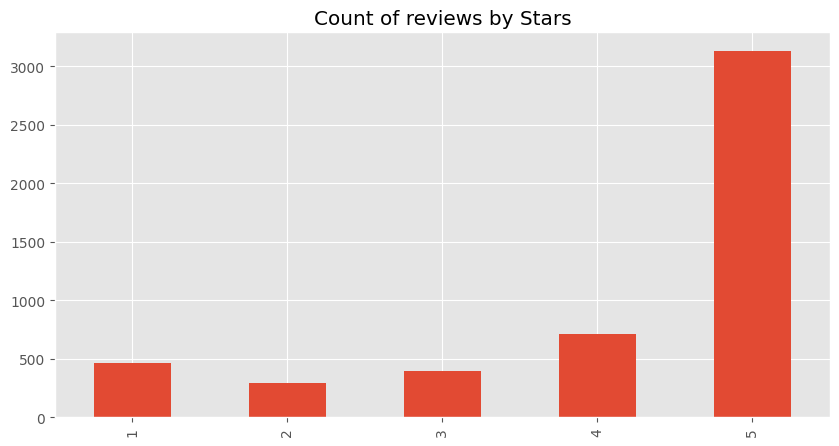

In [39]:
#eda
df['Score'].value_counts().sort_index().plot(kind='bar', title="Count of reviews by Stars", figsize=(10,5))

In [41]:
example= df['Text'][1000]
print(example)

I never in my life tasted such a good babka its crazy good! This is the real babka! That my gram mother use to make


In [42]:
nltk.word_tokenize(example)

['I',
 'never',
 'in',
 'my',
 'life',
 'tasted',
 'such',
 'a',
 'good',
 'babka',
 'its',
 'crazy',
 'good',
 '!',
 'This',
 'is',
 'the',
 'real',
 'babka',
 '!',
 'That',
 'my',
 'gram',
 'mother',
 'use',
 'to',
 'make']

In [45]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I', 'never', 'in', 'my', 'life', 'tasted', 'such', 'a', 'good', 'babka']

In [46]:
nltk.pos_tag(tokens)

[('I', 'PRP'),
 ('never', 'RB'),
 ('in', 'IN'),
 ('my', 'PRP$'),
 ('life', 'NN'),
 ('tasted', 'VBD'),
 ('such', 'PDT'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('babka', 'NN'),
 ('its', 'PRP$'),
 ('crazy', 'JJ'),
 ('good', 'JJ'),
 ('!', '.'),
 ('This', 'DT'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('real', 'JJ'),
 ('babka', 'NN'),
 ('!', '.'),
 ('That', 'IN'),
 ('my', 'PRP$'),
 ('gram', 'NN'),
 ('mother', 'NN'),
 ('use', 'NN'),
 ('to', 'TO'),
 ('make', 'VB')]

In [47]:
tagged = nltk.pos_tag(tokens)
tagged [:10]

[('I', 'PRP'),
 ('never', 'RB'),
 ('in', 'IN'),
 ('my', 'PRP$'),
 ('life', 'NN'),
 ('tasted', 'VBD'),
 ('such', 'PDT'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('babka', 'NN')]

In [49]:
nltk.download('maxent_ne_chunker')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()


(S
  I/PRP
  never/RB
  in/IN
  my/PRP$
  life/NN
  tasted/VBD
  such/PDT
  a/DT
  good/JJ
  babka/NN
  its/PRP$
  crazy/JJ
  good/JJ
  !/.
  This/DT
  is/VBZ
  the/DT
  real/JJ
  babka/NN
  !/.
  That/IN
  my/PRP$
  gram/NN
  mother/NN
  use/NN
  to/TO
  make/VB)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


**Vader**

In [50]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [51]:
sia

In [52]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [53]:
sia.polarity_scores('I am so sad!')

{'neg': 0.648, 'neu': 0.352, 'pos': 0.0, 'compound': -0.5697}

In [54]:
sia.polarity_scores(example)

{'neg': 0.083, 'neu': 0.695, 'pos': 0.222, 'compound': 0.6103}

In [55]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['Text']
  myid = row['Id']
  res[myid] = sia.polarity_scores(text)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [56]:
pd.DataFrame(res)

,1,2,3,4,5,6,7,8,9,10,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
neg,0.0000,0.1380,0.0910,0.0,0.0000,0.029,0.0340,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.1150,0.0000,0.080,0.0250,0.0260,0.0970,0.1540,0.0000
neu,0.6950,0.8620,0.7540,1.0,0.5520,0.809,0.6930,0.5200,0.8510,0.7050,...,0.5650,0.8180,0.8480,0.6790,0.692,0.8830,0.7640,0.8270,0.6370,0.7170
pos,0.3050,0.0000,0.1550,0.0,0.4480,0.163,0.2730,0.4800,0.1490,0.2950,...,0.4350,0.1820,0.0370,0.3210,0.228,0.0920,0.2100,0.0760,0.2090,0.2830
compound,0.9441,-0.5664,0.8265,0.0,0.9468,0.883,0.9346,0.9487,0.6369,0.8313,...,0.9531,0.7177,-0.8264,0.9693,0.792,0.7193,0.9846,-0.0554,0.9078,0.9923


In [57]:
pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
4996,0.025,0.883,0.092,0.7193
4997,0.026,0.764,0.210,0.9846
4998,0.097,0.827,0.076,-0.0554
4999,0.154,0.637,0.209,0.9078


In [58]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [60]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


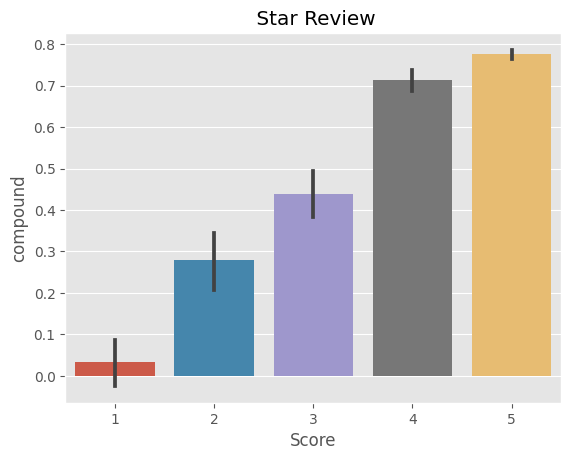

In [61]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title(' Star Review')
plt.show()

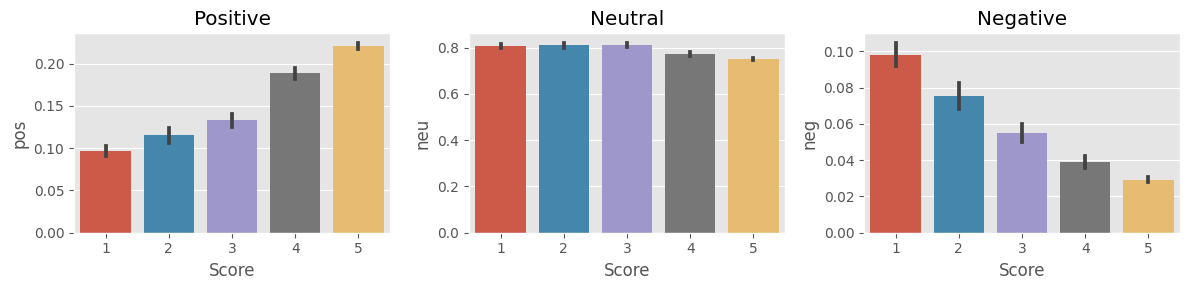

In [62]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

**Roberta**

In [63]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [64]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [65]:
print(example)
sia.polarity_scores(example)

I never in my life tasted such a good babka its crazy good! This is the real babka! That my gram mother use to make


{'neg': 0.083, 'neu': 0.695, 'pos': 0.222, 'compound': 0.6103}

In [66]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.003786468, 'roberta_neu': 0.020997662, 'roberta_pos': 0.97521585}


In [67]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [68]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/5000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863
Broke for id 1053
Broke for id 1070
Broke for id 1156
Broke for id 1321
Broke for id 1375
Broke for id 1498
Broke for id 1575
Broke for id 1796
Broke for id 1826
Broke for id 2169
Broke for id 2248
Broke for id 2476
Broke for id 2492
Broke for id 2584
Broke for id 2610
Broke for id 2897
Broke for id 2898
Broke for id 2902
Broke for id 2928
Broke for id 2942
Broke for id 2944
Broke for id 2947
Broke for id 2948
Broke for id 3022
Broke for id 3023
Broke for id 3025
Broke for id 3306
Broke for id 3788
Broke for id 3969
Broke for id 4107
Broke for id 4110
Broke for id 4307
Broke for id 4316
Broke for id 4408
Broke for id 4483
Broke for id 4512
Broke for id 4553
Broke for id 4583


In [70]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [73]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[5]

"I was not impressed with these cookies when I tried them, when they first came out and the company had only one flavor. I did not care for them but I knew that something more satisfying could be had because I'd tried others.<br /><br />I have found many great paleo cookie recipes on web sites and in paleo cookbooks that I love and they my friends, cooking students, and neighbors have really enjoyed. If you're looking for rock your taste buds paleo cookies, I suggest you check out the recipes for chocolate chip cookies and other flavors of cookies made from blanched almond flour found in The Gluten Free Almond Flour Cookbook, Make It Paleo, and on Elana Amsterdam's web site."

In [74]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[5]

'This has to be without a doubt the WORST tasting Hot Chocolate ever! The best way to describe the taste of "This Stuff" is really cheap suger free instant hot chocolate. Swiss Miss instant is way better and cost less. After only 3 cups threw the rest in the garbage where it belongs and canceled my subscribe and save for this "SLOP"!'

**negative**

In [76]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[10]

"I buy skinless sardines packed in water to keep my intake of sodium and chloresterol down.  For about $2 a can including tax and delivery I feel I am getting my money's worth.  I cannot get these kinds of sardines at the local supermarket.<br /><br />Sardines are somewhat tasteless.  I put the sardines on salad and top the salad with olive oil and red wine vinegar.  If I eat the sardines as a sandwich, I used mustard, which also has no salt and chloresterol."

In [77]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[10]

'Nothing but good feedback from everyone. A very good classic tasting licorice product. We buy it on subscription and save shipping and a little money.'